# Pytorch Classification Tutorial
- https://github.com/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/02_pytorch_classification_video.ipynb

In [23]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from helper_functions import plot_predictions, plot_decision_boundary
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)   

In [3]:
print(f'First 5 samples X \n {X[0:5]}')
print(f'First 5 samples y \n {y[0:5]}')

First 5 samples X 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples y 
 [1 1 1 1 0]


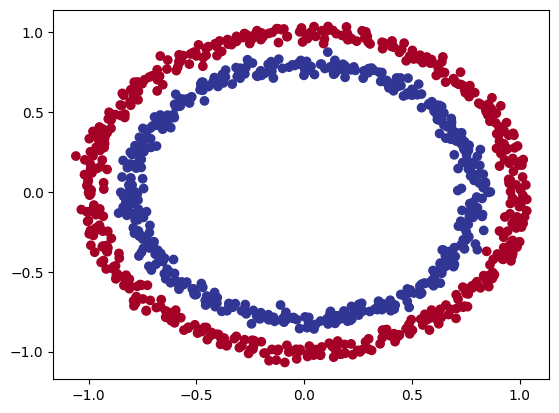

In [4]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [5]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Building Model
- Subclasses nn.Module (almost all models in PyTorch subclass nn.Module)
- 
Create 2 nn.Linear() layers that are capable of handling the shapes of our dat
- 
Defines a forward() method that outlines the forward pass (or forward computation) of the mod
- l
Instatiate an instance of our model class and send it to the target device

In [8]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )
        
    def forward(self, x : torch.Tensor) -> torch.Tensor :
        return self.layer(x)
        

In [9]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=8),
            nn.Linear(in_features=8, out_features=4),
            nn.ReLU(),
            nn.Linear(in_features=4, out_features=1)
        )
        
    def forward(self, x : torch.Tensor) -> torch.Tensor :
        return self.layer(x)

In [10]:
# model_0 = CircleModelV0().to(device)
# print(model_0)
# next(model_0.parameters())

In [11]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1)
        )

    def forward(self, x : torch.Tensor) -> torch.Tensor :
        return self.layer(x)

# class CircleModelV2(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.layer_1 = nn.Linear(in_features=2, out_features=10)
#     self.layer_2 = nn.Linear(in_features=10, out_features=10)
#     self.layer_3 = nn.Linear(in_features=10, out_features=1)
#     self.relu = nn.ReLU() # relu is a non-linear activation function
    
#   def forward(self, x):
#     # Where should we put our non-linear activation functions?
#     return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [12]:
model = CircleModelV2().to(device)
print(model)
print(next(model.parameters()))
print(model.state_dict())

CircleModelV2(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)
Parameter containing:
tensor([[-0.6715,  0.3887],
        [-0.2938,  0.6310],
        [-0.3124, -0.6305],
        [ 0.6668,  0.1748],
        [ 0.2188, -0.3564],
        [-0.4404,  0.2241],
        [ 0.3954,  0.4195],
        [-0.2259, -0.4551],
        [ 0.3727, -0.0878],
        [-0.1880, -0.7022]], device='cuda:0', requires_grad=True)
OrderedDict([('layer.0.weight', tensor([[-0.6715,  0.3887],
        [-0.2938,  0.6310],
        [-0.3124, -0.6305],
        [ 0.6668,  0.1748],
        [ 0.2188, -0.3564],
        [-0.4404,  0.2241],
        [ 0.3954,  0.4195],
        [-0.2259, -0.4551],
        [ 0.3727, -0.0878],
        [-0.1880, -0.7022]], device='cuda:0')), ('layer.0.bias', tensor([ 0.6978, -0.0961, -0.4920, -0.5979, -0.3891,  0.2

In [13]:
# Make predictions
with torch.inference_mode():
    untrained_y = model(X_test)

In [14]:
untrained_y[0:5]

tensor([[-0.1193],
        [-0.1295],
        [-0.1043],
        [-0.1236],
        [-0.1059]], device='cuda:0')

## Loss & Optimizer

In [15]:
loss_fn = nn.BCEWithLogitsLoss()

In [16]:
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [17]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right? 
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() 
  acc = (correct/len(y_pred)) * 100
  return acc

## Train Model

Calculate the loss
Optimizer zero grad
Loss backward (backpropagation)
Optimizer step (gradient desc
ent)scent)

In [18]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [19]:
epochs = 1000

In [20]:
for epoch in range(epochs):
    model.train()
    # 1. forward 
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # 2.  loss
    loss = loss_fn(y_logits,y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward (backpropagation)
    loss.backward()
    
    # 5. Optimizer step (gradient descent)
    optimizer.step() 

     ### Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass 
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    
    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69569, Acc: 50.00% | Test loss: 0.69496, Test acc: 50.00%
Epoch: 10 | Loss: 0.69466, Acc: 50.00% | Test loss: 0.69409, Test acc: 50.00%
Epoch: 20 | Loss: 0.69411, Acc: 50.00% | Test loss: 0.69363, Test acc: 50.00%
Epoch: 30 | Loss: 0.69362, Acc: 50.00% | Test loss: 0.69318, Test acc: 50.00%
Epoch: 40 | Loss: 0.69323, Acc: 50.00% | Test loss: 0.69289, Test acc: 50.00%
Epoch: 50 | Loss: 0.69302, Acc: 48.50% | Test loss: 0.69273, Test acc: 48.50%
Epoch: 60 | Loss: 0.69284, Acc: 50.50% | Test loss: 0.69260, Test acc: 51.00%
Epoch: 70 | Loss: 0.69267, Acc: 50.50% | Test loss: 0.69249, Test acc: 52.00%
Epoch: 80 | Loss: 0.69250, Acc: 51.25% | Test loss: 0.69239, Test acc: 52.50%
Epoch: 90 | Loss: 0.69234, Acc: 51.25% | Test loss: 0.69230, Test acc: 52.00%
Epoch: 100 | Loss: 0.69219, Acc: 51.50% | Test loss: 0.69222, Test acc: 52.00%
Epoch: 110 | Loss: 0.69204, Acc: 52.25% | Test loss: 0.69214, Test acc: 52.00%
Epoch: 120 | Loss: 0.69187, Acc: 54.12% | Test loss: 0.69203, T

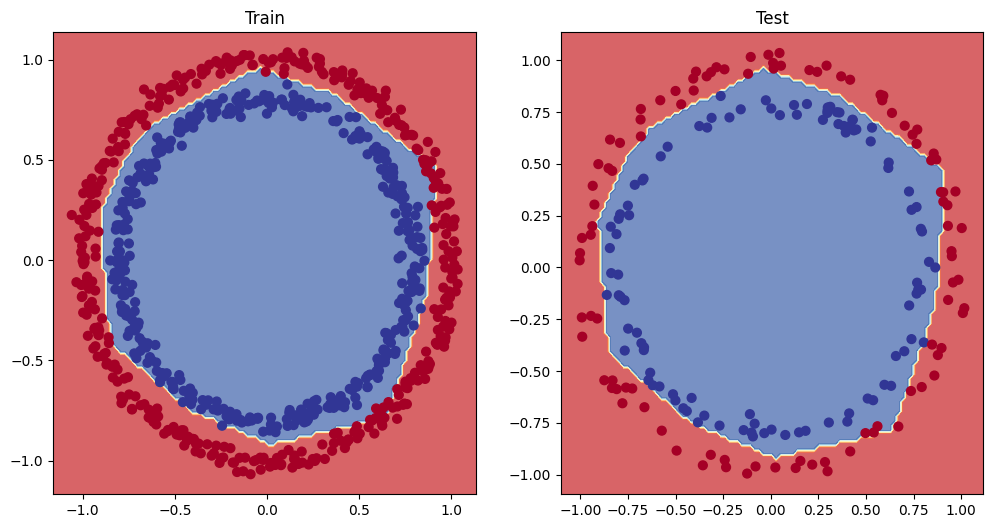

In [21]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test) 

In [22]:
# 5. Improving our model

# MultiClass Classification